<a href="https://colab.research.google.com/github/kevintg99/marvel_data_project/blob/main/marvel_data_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests

In [3]:
import hashlib
import time

public_key = "xxxxxxxxxxxxxxxxxxxxxxx"
private_key = "xxxxxxxxxxxxxxxxxxxxxx"

ts = str(time.time())

to_hash = ts + private_key +public_key
hash_md5 = hashlib.md5(to_hash.encode()).hexdigest()

params = {
    "ts": ts,
    "apikey": public_key,
    "hash": hash_md5
}

In [4]:
import requests
import pandas as pd
#ingestao dos personagens
base_url = "https://gateway.marvel.com:443/v1/public/characters"

params.update({"limit": 100, "offset": 0})

response = requests.get(base_url, params=params)
data = response.json()

characters = data['data']['results']

characters_list = []

for char in characters:
    characters_list.append(({
        "id": char.get("id"),
        "name": char.get("name"),
        "description": char.get("description"),
        "modified": char.get("modified"),
        "comics_available": char['comics']['available'],
        "series_available": char['series']['available'],
        "stories_available": char['stories']['available'],
        "events_available": char['events']['available']
    })
    )
df_characters = pd.DataFrame(characters_list)
#mostrar como esta
display(df_characters)

,id,name,description,modified,comics_available,series_available,stories_available,events_available
0,1011334,3-D Man,,2014-04-29T14:18:17+0000,12,3,21,1
1,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18T15:54:04+0000,4,2,7,0
2,1009144,A.I.M.,AIM is a terrorist organization bent on destro...,2013-10-17T14:41:30+0000,53,35,61,0
3,1010699,Aaron Stack,,1970-01-01T00:00:00+0000,14,3,28,0
4,1009146,Abomination (Emil Blonsky),"Formerly known as Emil Blonsky, a spy of Sovie...",2014-06-27T19:39:07+0000,55,28,68,1
...,...,...,...,...,...,...,...,...
95,1009171,Bastion,,2013-10-24T13:07:45+0000,35,20,37,2
96,1009172,Batroc the Leaper,,2014-04-03T17:26:39+0000,30,15,37,0
97,1009173,Battering Ram,,1970-01-01T00:00:00+0000,2,2,2,0
98,1011785,Battlestar,Lamar Hoskins was once a wrestler who was give...,2021-08-12T23:47:13+0000,9,4,16,1


In [5]:
#Removendo valores nullos de colunas que importam
df_characters = df_characters.dropna(subset=['name'])

In [6]:
#tratando valores nulos nas colunas de metricas (substituir por 0)
df_characters['comics_available'] = df_characters['comics_available'].fillna(0)
df_characters['series_available'] = df_characters['series_available'].fillna(0)
df_characters['stories_available'] = df_characters['stories_available'].fillna(0)
df_characters['events_available'] = df_characters['events_available'].fillna(0)

In [7]:
#renomeando as colunas para facilitar a leitura
df_characters.rename(columns={
    'comics_available': 'Comics Disponíveis',
    'series_available': 'Séries Disponíveis',
    'stories_available': 'Histórias Disponíveis',
    'events_available': 'Eventos Disponíveis',
    'modified': 'Última Modificação'
}, inplace=True)

In [8]:
#tratando a coluna de data da ultima modificação para o formato correto
df_characters['Última Modificação'] = pd.to_datetime(df_characters['Última Modificação'], errors='coerce')


In [9]:
#criando a pontuação para cada personagem
df_characters['Pontuação'] = (df_characters['Comics Disponíveis'] * 1) + \
                             (df_characters['Séries Disponíveis'] * 2) + \
                             (df_characters['Histórias Disponíveis'] * 0.5) + \
                             (df_characters['Eventos Disponíveis'] * 3)


In [10]:
df_characters_sorted = df_characters.sort_values(by='Pontuação', ascending=False)
top_10 = df_characters_sorted[['name', 'Pontuação']].head(10)


In [11]:
print("Top 10 Personagens da Marvel por Pontuação:")
print(top_10)

Top 10 Personagens da Marvel por Pontuação:
                              name  Pontuação
82                        Avengers     5365.5
65                       Archangel     1211.5
32                    Alpha Flight      540.5
10                    Adam Warlock      519.0
86                         Banshee      438.0
58                      Apocalypse      350.5
56            Ant-Man (Scott Lang)      340.5
87        Banshee (Theresa Rourke)      328.5
35                     Amadeus Cho      320.5
48  Angel (Warren Worthington III)      296.5


<ipython-input-15-ab0aed2f9faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pontuação', y='name', data=top_10, palette="viridis")


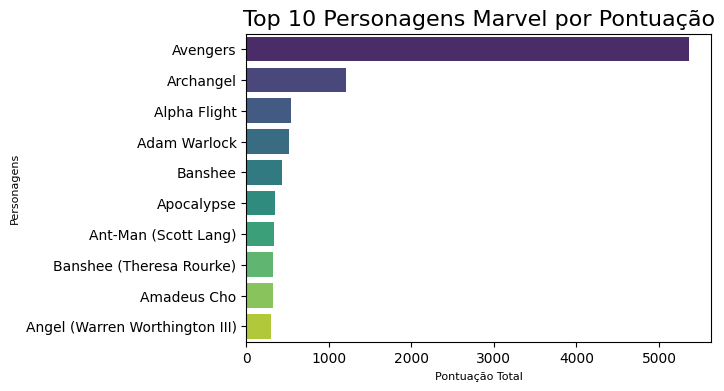

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x='Pontuação', y='name', data=top_10, palette="viridis")
plt.title('Top 10 Personagens Marvel por Pontuação', fontsize=16)
plt.xlabel('Pontuação Total', fontsize=8)
plt.ylabel('Personagens', fontsize=8)
plt.show()

In [17]:
from datetime import datetime, timedelta
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
top_comics = df_characters[['name', 'Comics Disponíveis']].sort_values(by='Comics Disponíveis', ascending=False).head(10)
top_events = df_characters[['name', 'Eventos Disponíveis']].sort_values(by='Eventos Disponíveis', ascending=False).head(10)
five_years_ago = datetime.now() - timedelta(days=5*365)

In [30]:
df_characters['Última Modificação'] = pd.to_datetime(df_characters['Última Modificação'], errors='coerce')

# Garantir que as datas estão sem fuso horário
df_characters['Última Modificação'] = df_characters['Última Modificação'].dt.tz_localize(None)

# 3. Quantidade de personagens modificados nos últimos 5 anos
from datetime import datetime, timedelta

# Definir o intervalo de 5 anos
five_years_ago = datetime.now() - timedelta(days=5*365)

# Filtrar personagens modificados nos últimos 5 anos
recently_modified = df_characters[df_characters['Última Modificação'] > five_years_ago]
num_recently_modified = recently_modified.shape[0]

<ipython-input-37-68af9c339145>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Comics Disponíveis', y='name', data=top_comics, palette="viridis")


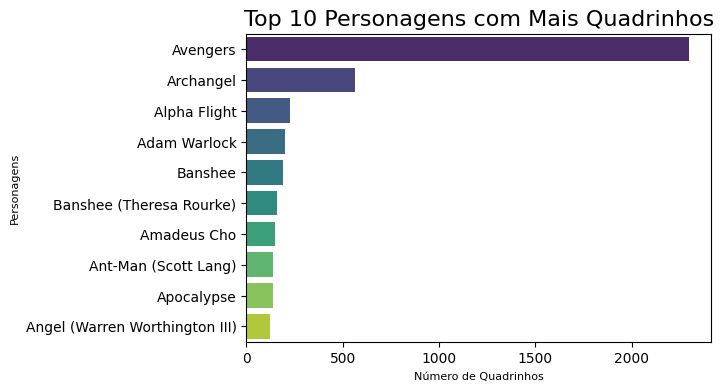

In [37]:
#Top 10 Personagens com Mais Quadrinhos
plt.figure(figsize=(6, 4))
sns.barplot(x='Comics Disponíveis', y='name', data=top_comics, palette="viridis")
plt.title('Top 10 Personagens com Mais Quadrinhos', fontsize=16)
plt.xlabel('Número de Quadrinhos', fontsize=8)
plt.ylabel('Personagens', fontsize=8)
plt.show()

<ipython-input-23-35be7b05be99>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Eventos Disponíveis', y='name', data=top_events, palette="magma")


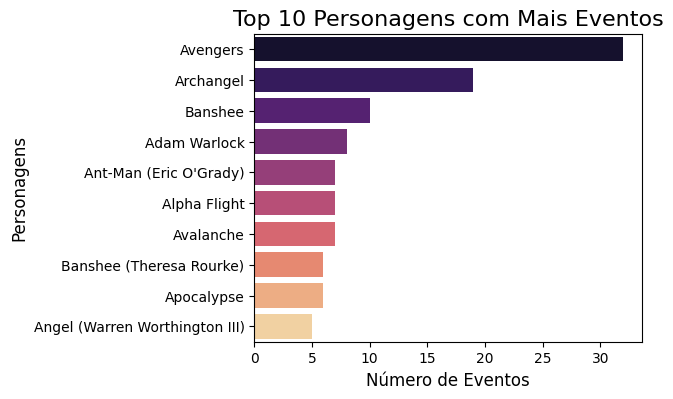

In [23]:
#Top 10 Personagens com Mais Eventos
plt.figure(figsize=(5, 4))
sns.barplot(x='Eventos Disponíveis', y='name', data=top_events, palette="magma")
plt.title('Top 10 Personagens com Mais Eventos', fontsize=16)
plt.xlabel('Número de Eventos', fontsize=12)
plt.ylabel('Personagens', fontsize=12)
plt.show()


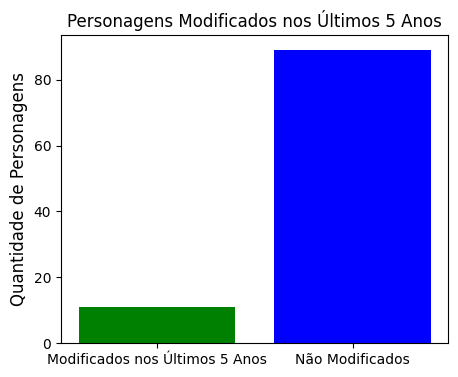

In [36]:
#Número de Personagens Modificados nos Últimos 5 Anos
plt.figure(figsize=(5, 4))
plt.bar(['Modificados nos Últimos 5 Anos', 'Não Modificados'], [num_recently_modified, df_characters.shape[0] - num_recently_modified], color=['green', 'blue'])
plt.title('Personagens Modificados nos Últimos 5 Anos', fontsize=12)
plt.ylabel('Quantidade de Personagens', fontsize=12)
plt.show()